# How to use Google calendar API?

How to import Google calendar API?


In [ ]:
var execSync = require('child_process').execSync;
try {
    require.resolve('googleapis');
    require.resolve('google-auth-library');
} catch (e) {
    execSync('npm install googleapis google-auth-library');
}
var google = require('googleapis');
var googleAuth = require('google-auth-library');

var importer = require('../Core');
var seleniumPath = '../Selenium/google authorize.ipynb';

// Authorize a client with the loaded credentials, then call the
  // Google Calendar API.
var oauth2Client;
var getOauthClient = () => {
    return importer.importNotebook(seleniumPath)
    .then(r => r.authorize(['https://www.googleapis.com/auth/calendar']))
    .then(c => {
        var auth = new googleAuth();
        oauth2Client = new auth.OAuth2(
            c.clientId_, c.clientSecret_, c.redirectUri_);
        oauth2Client.credentials = c.credentials;
        return oauth2Client;
    })
};
module.exports = getOauthClient;
getOauthClient;



How to list events?

In [ ]:
var google = require('googleapis');

var processResult = (err, response) => {
    if (err) {
      console.log('The API returned an error: ' + err);
      throw err;
    }
    resultEvents = []; // reset the array
    var events = response.items;
    if (events.length == 0) {
        console.log('No events found.');
    } else {
        for (var i = 0; i < events.length; i++) {
            var event = events[i];
            var start = event.start.dateTime || event.start.date;
            resultEvents[resultEvents.length] = {
                start: new Date(start), event: event};
        }
    }
    return resultEvents;
};

/**
 * Lists the next 10 events on the user's primary calendar.
 *
 * @param {google.auth.OAuth2} auth An authorized OAuth2 client.
 */
var resultEvents = [];
var listEvents = (options = {calendarId: 'primary'}) => {
    var auth;
    return getOauthClient()
    .then(r => auth = r)
    .then(() => {
        if(typeof options['calendarId'] == 'undefined') {
            options['calendarId'] = 'primary';
        }
        var calendar = google.calendar('v3');
        var data = Object.assign({}, options, {
            auth: auth,
            //calendarId: 'p4685f6at8ccctenocjlqgnqss@group.calendar.google.com',
            //calendarId: 'rqqhq3me7ggg47chafhmeo6m3s@group.calendar.google.com',
            //q: 'work on SOS',
            maxResults: 100,
            singleEvents: true,
            orderBy: 'startTime'
        });
        return new Promise((resolve, reject) => {
            calendar.events.list(data, (err, response) => {
                try {
                    var events = processResult(err, response);
                    resolve(events);
                } catch (e) {
                    reject(e);
                }
            });
        });
    });
};
module.exports = listEvents;
listEvents;



In [ ]:
var importer = require('../Core');

var ISODateString;
var listEventBetweenTwoDates = (min, max) => {
    var startDate = new Date(min);
    var endDate = new Date(max);
    return importer.interpretAll([
        'convert date to ISO'
    ])
    .then(r => {
        console.log(r);
        ISODateString = r[0].runInNewContext();
        return listEvents({
            timeMin: ISODateString(startDate),
            timeMax: ISODateString(endDate),
        });
    });
};
module.exports = listEventBetweenTwoDates;
listEventBetweenTwoDates;



In [ ]:
// test Google calendar API?
$$.async();
getOauthClient()
.then(r => listEventBetweenTwoDates(new Date('2016/09/22'), new Date('2016/09/23')))
.then(r => $$.sendResult(r))
.catch(e => $$.sendError(e));



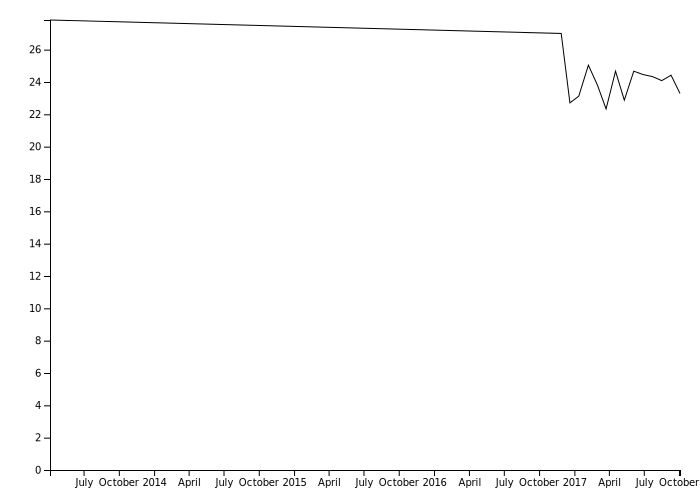

In [1]:
var importer = require('../Core');

$$.async();
var filterDistant, getOauthClient, listEvents, graphDates;
importer.interpretAll([
    'import google calendar api',
    'how to list events',
    'number of days between events',
    'display recurrence line graph'
])
.then(r => {
    getOauthClient = r[0].runInNewContext();
    listEvents = r[1].runInNewContext({getOauthClient});
    filterDistant = r[2].runInNewContext();
    graphDates = r[3].runInNewContext();
})
.then(() => listEvents({
    q: 'period',
    calendarId: 'p4685f6at8ccctenocjlqgnqss@group.calendar.google.com'
}))
.then(r => {
    $$.svg(graphDates(filterDistant(r)))
})
.catch(e => $$.sendError(e));



In [4]:
var importer = require('../Core');

$$.async();
var sumEvents, getOauthClient, listEvents, ISODateString;
importer.interpretAll([
    'import google calendar api',
    'how to list events',
    'sum a list of events',
    'convert date to ISO'
])
.then(r => {
    getOauthClient = r[0].runInNewContext();
    listEvents = r[1].runInNewContext({getOauthClient});
    sumEvents = r[2].runInNewContext();
    ISODateString = r[3].runInNewContext();
})
.then(() => listEvents({
    timeMin: ISODateString(new Date('2016/09/22')),
    timeMax: ISODateString(new Date('2017/09/22')),
    q: 'study sauce'
}))
.then(r => {
    console.log(r);
    $$.sendResult(sumEvents(r))
})
.catch(e => $$.sendError(e));



Already imported
[ 'import notebook.ipynb',
  'interpret all notebooks.ipynb',
  'google authorize.ipynb' ]
Already imported
[ 'import notebook.ipynb',
  'interpret all notebooks.ipynb',
  'google authorize.ipynb' ]
[ { start: 2016-10-05T15:00:00.000Z,
    event: 
     { kind: 'calendar#event',
       etag: '"2951363990498000"',
       id: 'i0nop08873bf6957u04tebtmc0',
       status: 'confirmed',
       htmlLink: 'https://www.google.com/calendar/event?eid=aTBub3AwODg3M2JmNjk1N3UwNHRlYnRtYzAgbWVnYW1pbmRicmlhbkBt',
       created: '2016-10-05T03:58:27.000Z',
       updated: '2016-10-05T15:39:55.249Z',
       summary: 'Work on Study Sauce',
       creator: [Object],
       organizer: [Object],
       start: [Object],
       end: [Object],
       iCalUID: 'i0nop08873bf6957u04tebtmc0@google.com',
       sequence: 4,
       reminders: [Object] } },
  { start: 2016-10-06T22:30:00.000Z,
    event: 
     { kind: 'calendar#event',
       etag: '"2951596983688000"',
       id: '0c0o15kam31mo4arll

159.5